In [329]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm

In [330]:
df = pd.read_csv('monthly_count.csv')

In [331]:
crime_M = df
crime_M.rename(columns={'CMPLNT_FR_DT': 'Month'}, inplace = True)
crime_M.set_index('Month', inplace = True)
crime_M.head()

,Count
Month,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679


In [332]:
# crime_M = df.groupby(['CMPLNT_FR_DT'])['Count'].sum()

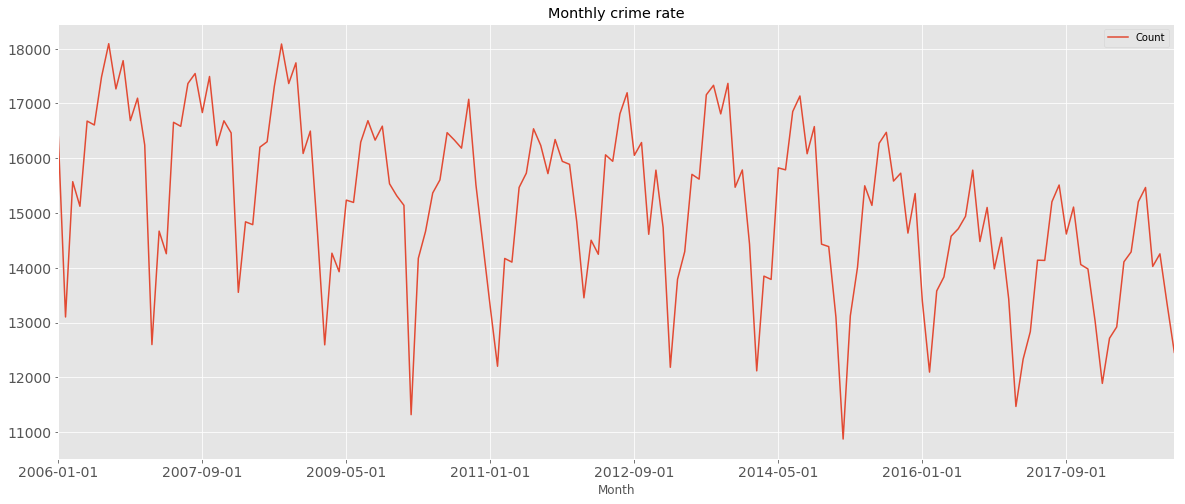

In [333]:
crime_M.plot(figsize=(20,8), title= 'Monthly crime rate', fontsize=14)

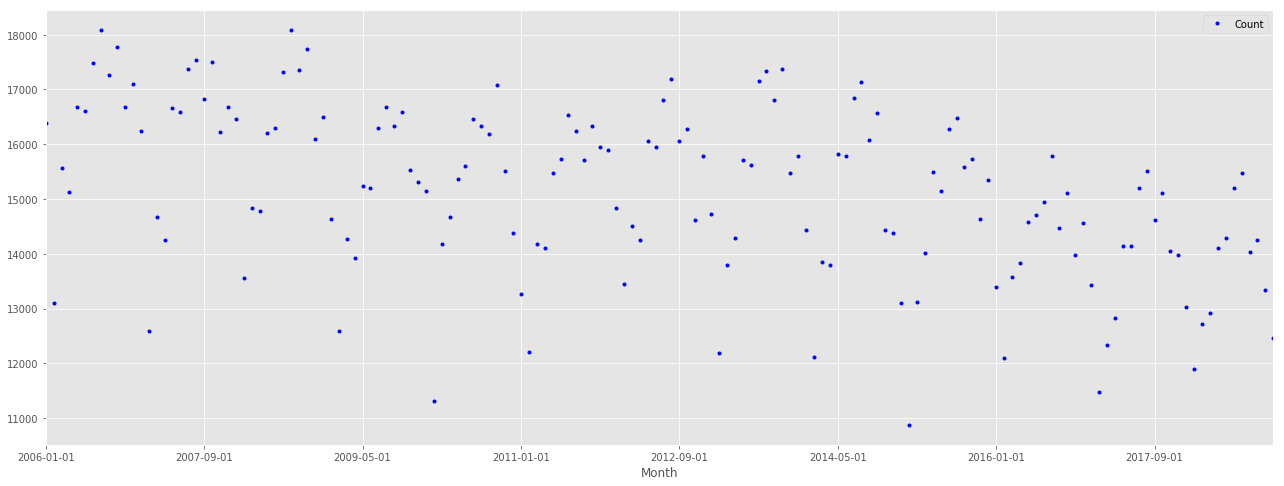

In [334]:
crime_M.plot(figsize = (22,8), style = 'b.')
plt.show()

# Data Components 

<Figure size 432x288 with 0 Axes>

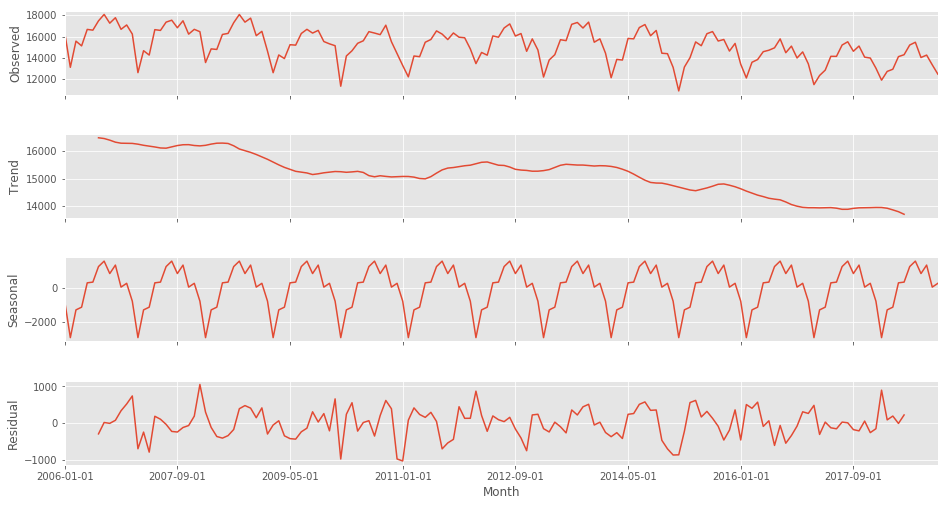

In [335]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(crime_M , freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

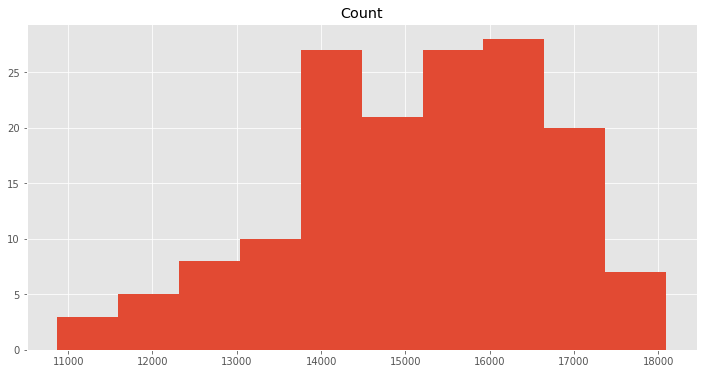

In [336]:
# Plot a histogram of the temperature dataset
crime_M.hist(figsize = (12,6))
plt.show()

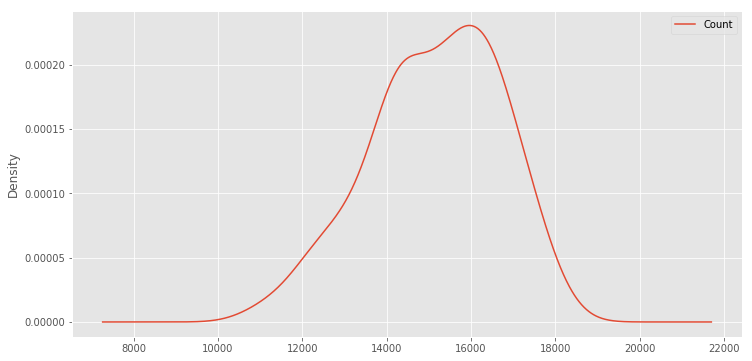

In [337]:
# Plot a density plot for temperature dataset
crime_M.plot(kind='kde', figsize = (12,6))
plt.show()

In [338]:
crime_M.head()

,Count
Month,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679


In [339]:
type(crime_M)

pandas.core.frame.DataFrame

In [340]:
crime_M.index = pd.to_datetime(
  crime_M.index, errors='coerce', infer_datetime_format = True)

In [341]:
crime_M.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Month', length=156, freq=None)

In [342]:
year_groups = crime_M.groupby(pd.Grouper(freq ='A'))
crime_annual = pd.DataFrame()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c350007b8>,
      dtype=object)

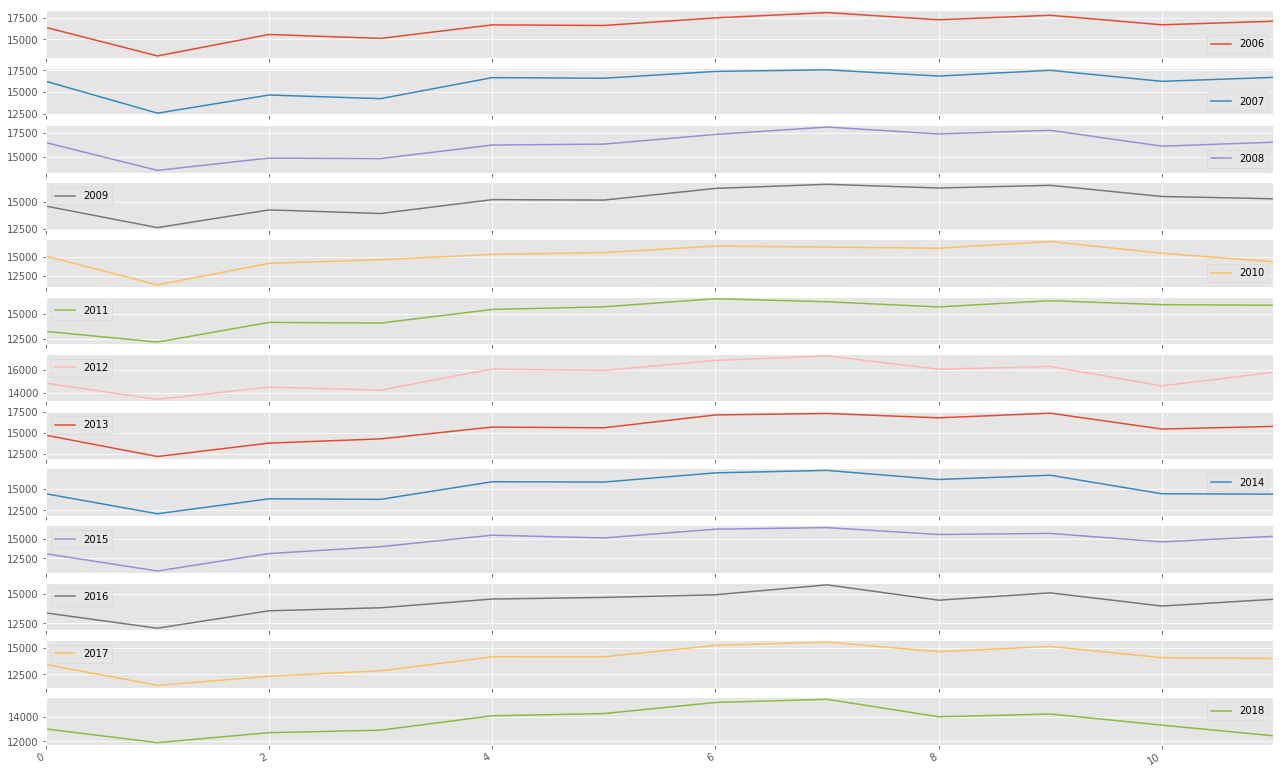

In [343]:
for yr, group in year_groups:
    crime_annual[yr.year] = group.values.ravel()
# Plot the yearly groups as subplots
crime_annual.plot(figsize = (22,15), subplots=True, legend=True)


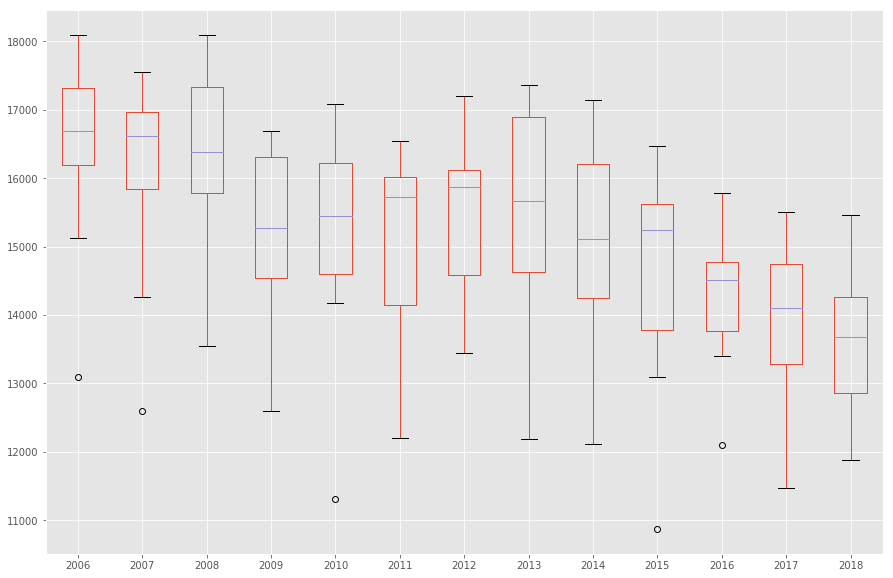

In [344]:
# Generate a box and whiskers plot for annual crime dataframe
crime_annual.boxplot(figsize = (15,10))
plt.show()

# Statistical Stationarity: 

In [433]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

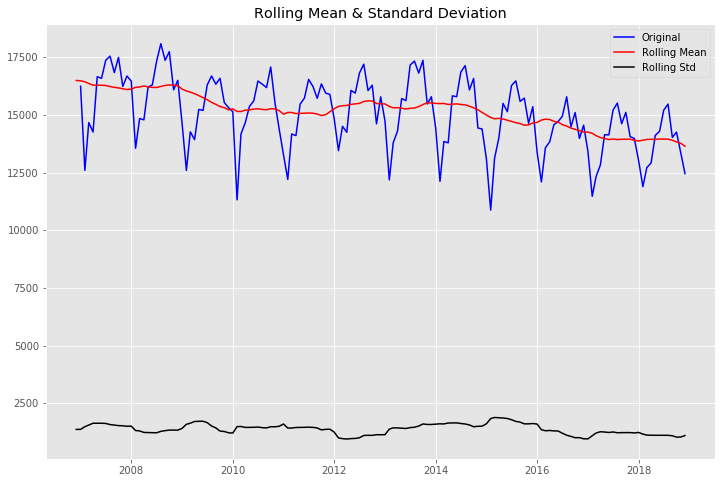

Results of Dickey-Fuller Test:
Test Statistic                  -0.437883
p-value                          0.903579
#Lags Used                      12.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [434]:
#test the stationarity of the original dataset
test_stationarity(crime_M.Count, 12)

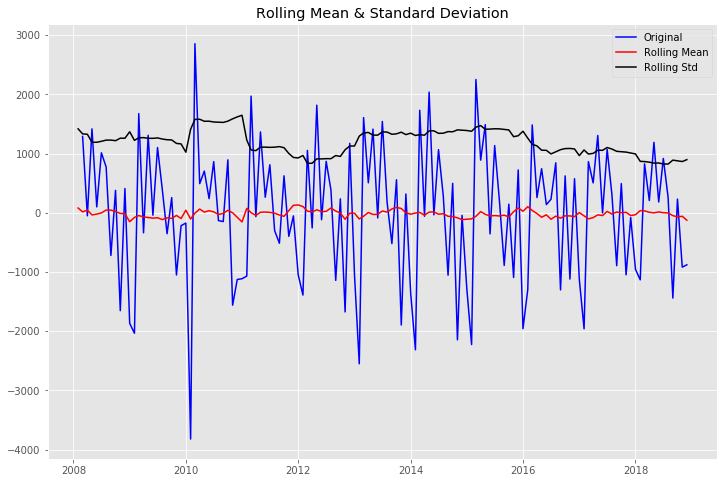

Results of Dickey-Fuller Test:
Test Statistic                  -5.632242
p-value                          0.000001
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [435]:
#test the stationarity of the untransformed dataset
test_stationarity(crime_M_diff.Count, 12)

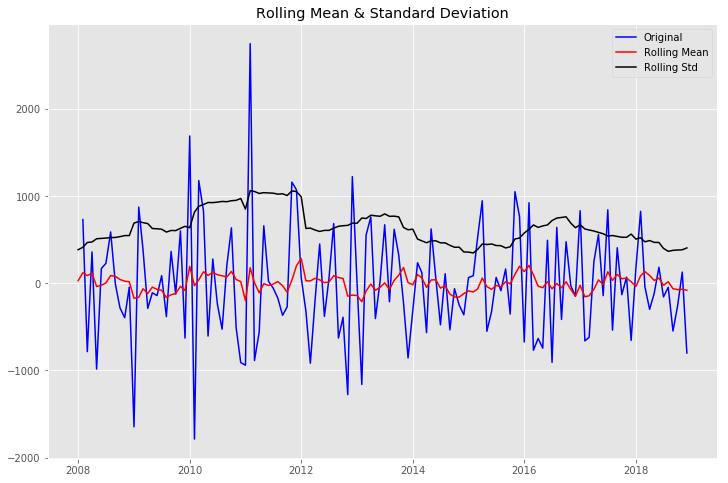

Results of Dickey-Fuller Test:
Test Statistic                  -4.672124
p-value                          0.000095
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


In [436]:
crime_M['first_diff'] = crime_M['Count'].diff(periods=1)
crime_M['first_diff_season'] = crime_M['first_diff'].diff(periods=12)
test_stationarity(crime_M['first_diff_season'].dropna(), 12)

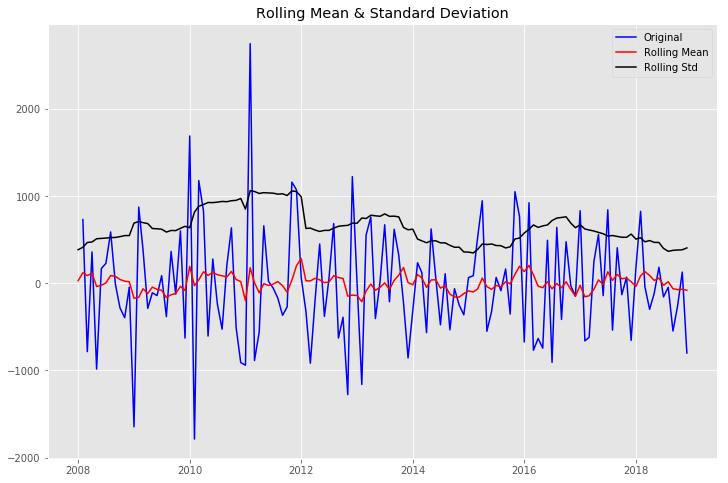

Results of Dickey-Fuller Test:
Test Statistic                  -4.672124
p-value                          0.000095
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


In [437]:
# crime_M['first_diff'] = crime_M['Count'].diff(periods=1)
# crime_M['first_diff_season'] = crime_M['first_diff'].diff(periods=12)
# test_stationarity(crime_M['first_diff_season'].dropna(), 12)

crime_M['seasonal_diff'] = crime_M['Count'].diff(periods=12)
crime_M['seasonal_diff_first'] = crime_M['seasonal_diff'].diff(periods=1)
test_stationarity(crime_M['seasonal_diff_first'].dropna(), 12)

# AUC & PAUC

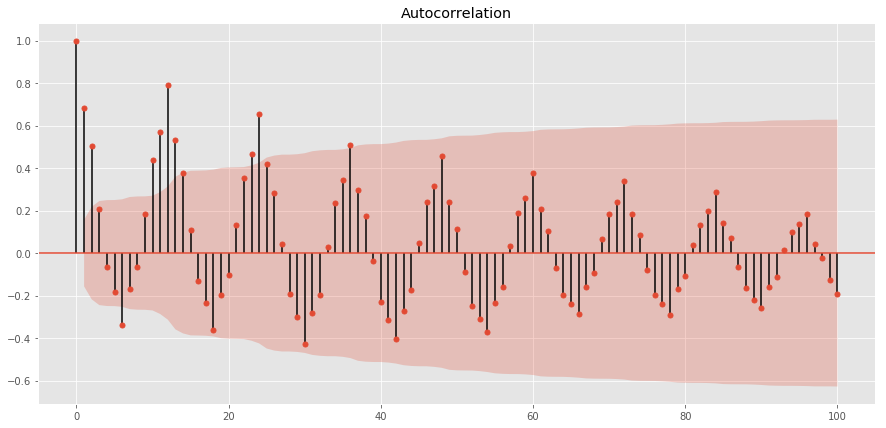

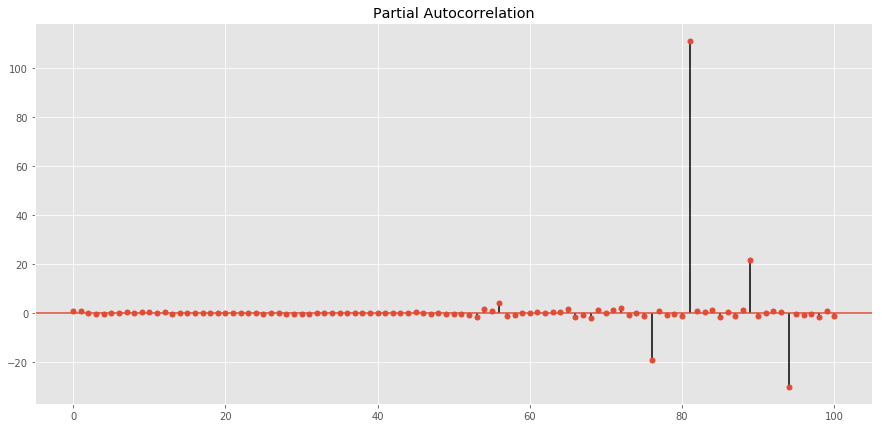

In [438]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams


fig, ax = plt.subplots(figsize=(15,7))
plot_acf(crime_M.Count,ax=ax, lags=100);

fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(crime_M.Count,ax=ax, lags=100);

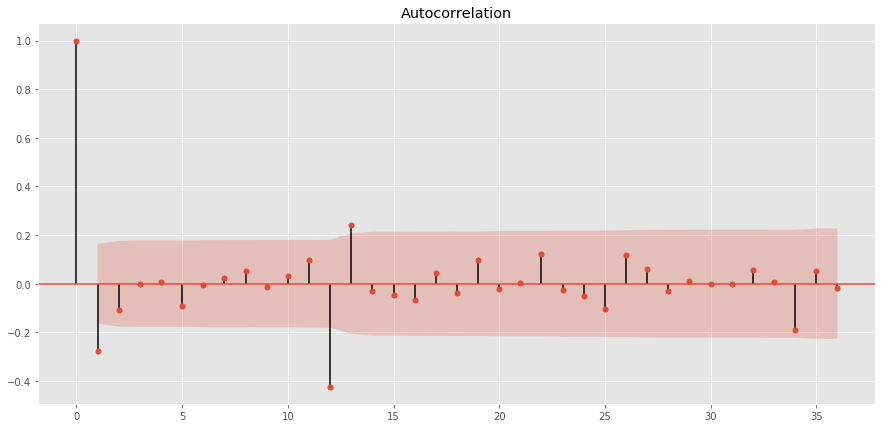

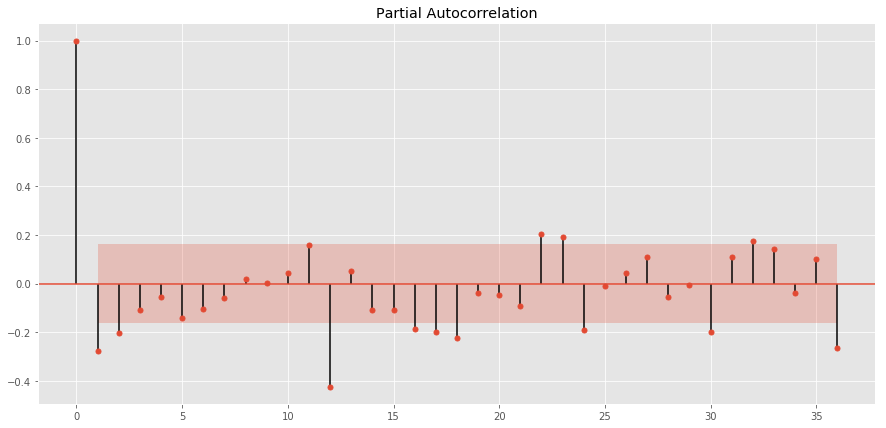

In [439]:
fig, ax = plt.subplots(figsize=(15,7))
plot_acf(crime_M.seasonal_diff_first.dropna(),ax=ax, lags=36);

fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(crime_M.seasonal_diff_first.dropna(),ax=ax, lags=36);

In [510]:
crime_M_diff= crime_M.diff().dropna()
crime_M_diff.head()

,Count,first_diff,first_diff_season,seasonal_diff,seasonal_diff_first,predict_dynamic,predict_ahead
Month,,,,,,,
2018-02-01,-1134.0,-178.0,657.0,827.0,657.0,-1947.088521,-1824.864619
2018-03-01,825.0,1959.0,-865.0,-38.0,-865.0,1385.334918,1951.102077
2018-04-01,206.0,-619.0,-260.0,-298.0,-260.0,372.485734,71.432357
2018-05-01,1189.0,983.0,183.0,-115.0,183.0,1344.101507,1299.211207
2018-06-01,181.0,-1008.0,300.0,185.0,300.0,-27.207677,-166.721123


In [443]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [311]:
# # Define the p, d and q parameters to take any value between 0 and 2
# p = d = q = range(0, 2)

# # Generate all different combinations of p, q and q triplets
# pdq = list(itertools.product(p, d, q))

# # Generate all different combinations of seasonal p, q and q triplets
# pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [315]:
# # Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(crime_M_diff,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue


# Model Evaluation

In [444]:
mod = sm.tsa.statespace.SARIMAX(crime_M['Count'],order=(0, 1, 2), seasonal_order=(0,1,2,12))
res = mod.fit()
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  156
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1100.079
Date:                            Thu, 30 May 2019   AIC                           2210.158
Time:                                    21:49:16   BIC                           2224.972
Sample:                                01-01-2006   HQIC                          2216.178
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3200      0.046     -6.928      0.000      -0.410      -0.229
ma.L2         -0.1462      0.053   

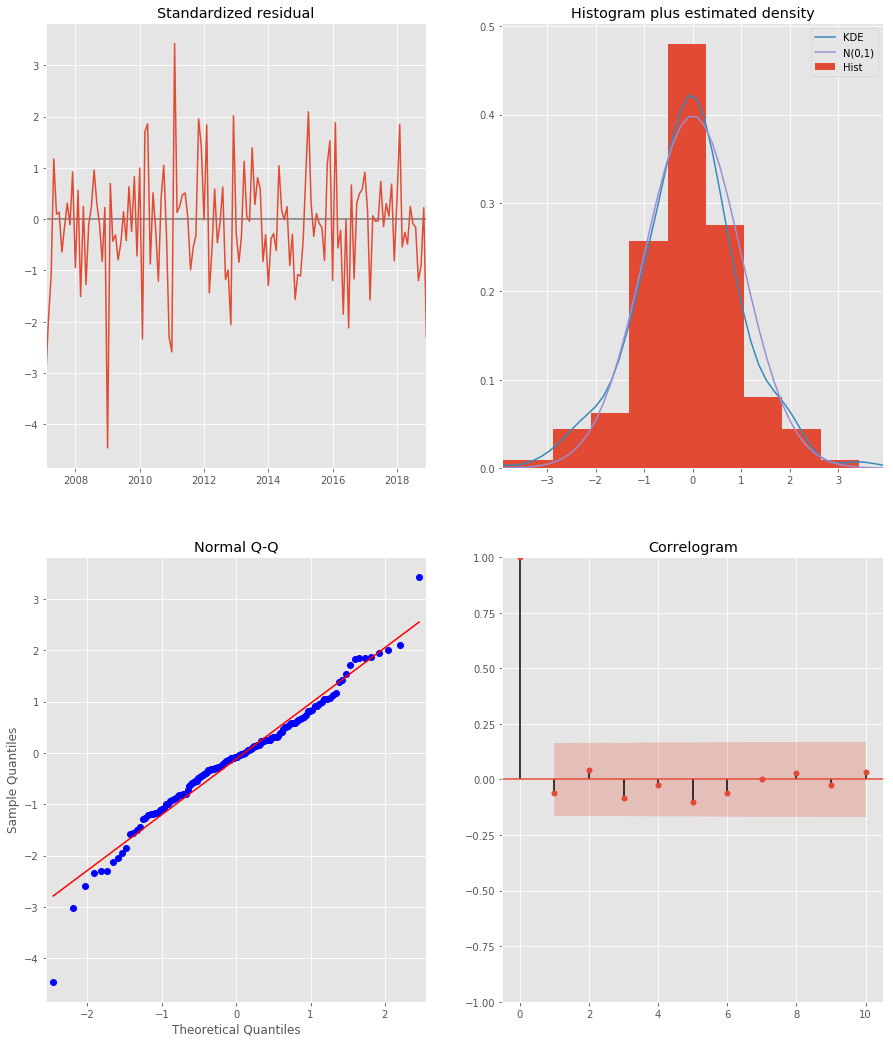

In [445]:
# Use plot_diagnostics with results calculated above.
res.plot_diagnostics(figsize=(15, 18))
plt.show()

In [446]:
crime_M['predict_dynamic']= res.predict(start=-12, dynamic=True)
crime_M['predict_ahead']= res.predict(start=-12, dynamic=False)

In [447]:
crime_M.tail(12)

,Count,first_diff,first_diff_season,seasonal_diff,seasonal_diff_first,predict_dynamic,predict_ahead
Month,,,,,,,
2018-01-01,13022,-956.0,170.0,-406.0,170.0,12842.277678,12842.277678
2018-02-01,11888,-1134.0,827.0,421.0,827.0,10895.189156,11017.413058
2018-03-01,12713,825.0,-38.0,383.0,-38.0,12280.524075,12968.515136
2018-04-01,12919,206.0,-298.0,85.0,-298.0,12653.009808,13039.947493
2018-05-01,14108,1189.0,-115.0,-30.0,-115.0,13997.111315,14339.158700
2018-06-01,14289,181.0,185.0,155.0,185.0,13969.903638,14172.437577
2018-07-01,15205,916.0,-155.0,0.0,-155.0,14930.625994,15246.226297
2018-08-01,15466,261.0,-45.0,-45.0,-45.0,15270.453374,15540.975096
2018-09-01,14024,-1442.0,-547.0,-592.0,-547.0,14364.200172,14589.763580


In [361]:
# ARIMA_MODEL = sm.tsa.statespace.SARIMAX(crime_M_diff,
#                                 order=(1, 1, 1),
#                                 seasonal_order=(0, 1, 1, 12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)

# output = ARIMA_MODEL.fit()
# print(output.summary())


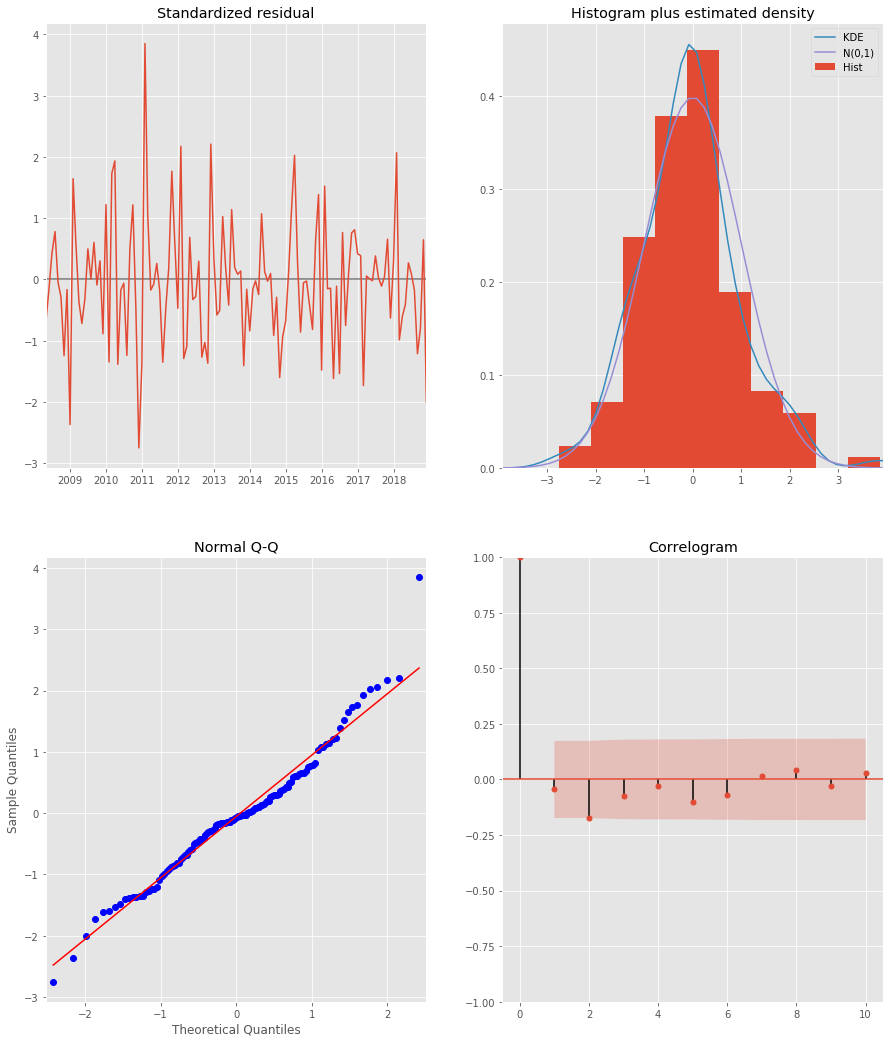

In [449]:
# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

#  KDE line follows closely with the N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). 
#  This is a good indication that the residuals are normally distributed.
# The distribution of residuals (blue dots) are following the linear trend with some slight random pattern but 
# we can consider the residuals as almost normally distributed.

# The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. 
# This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series
# residuals have low correlation with lagged versions of itself.



In [229]:
# training_data = crime_M.loc[crime_M.index < "2015-01-01"]
# validation_set = crime_M.loc[crime_M.index >= "2015-01-01"]

In [236]:
# print(len(training_data))
# print(len(validation_set))

108
48


In [ ]:
# pred = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
# pred_conf = pred.conf_int()

In [412]:
# crime_M_diff['forecast'] = res.predict(start = 54, end= 72, dynamic= False)  
# crime_M_diff[['Count', 'forecast']].plot(figsize=(16, 12)) 

In [450]:
crime_x = pd.read_csv('final.csv')

In [451]:
crime_x.index = pd.to_datetime(
  crime_x.Month, errors='coerce', infer_datetime_format = True)
crime_x.drop(labels=['Month'], axis=1, inplace=True)

In [518]:
for col in crime_x.columns:
    diff = crime_x[col].diff(periods=1)
    crime_x['{}_Diff'.format(col)] = diff.diff(periods=12)

    

In [523]:
crime_x.tail()

,Count,Unem_R,Mean_Temp,Over70,Days,predict_dynamic,predict_ahead,Count_Diff,Unem_R_Diff,Mean_Temp_Diff,Over70_Diff,Days_Diff,predict_dynamic_Diff,predict_ahead_Diff
Month,,,,,,,,,,,,,,
2018-08-01,15466,4.0,83.711935,31.0,31,15519.126133,15644.065924,-45.0,-3.000000e-01,2.450323,-1.0,0.0,NaN,NaN
2018-09-01,14024,3.6,75.378000,23.0,30,14449.021335,14469.235514,-547.0,4.440892e-16,-5.123763,-2.0,0.0,NaN,NaN
2018-10-01,14254,3.6,62.257097,8.0,31,14806.264625,14564.624503,-262.0,2.000000e-01,-6.127527,-10.0,0.0,NaN,NaN
2018-11-01,13335,3.5,48.006333,0.0,30,13373.355629,12949.031182,130.0,-1.000000e-01,3.280194,8.0,0.0,NaN,NaN
2018-12-01,12455,3.9,43.165161,0.0,31,13994.739985,13797.422963,-799.0,4.000000e-01,9.191097,2.0,0.0,NaN,NaN


In [520]:
print(crime_M.shape, crime_x.shape)

(156, 7) (156, 14)


In [528]:
exog = crime_x[['Unem_R', 'Mean_Temp_Diff', 'Over70_Diff', 'Days']]

In [537]:
crime_x

,Count,Unem_R,Mean_Temp,Over70,Days,predict_dynamic,predict_ahead,Count_Diff,Unem_R_Diff,Mean_Temp_Diff,Over70_Diff,Days_Diff,predict_dynamic_Diff,predict_ahead_Diff
Month,,,,,,,,,,,,,,
2006-01-01,16392,5.1,45.033226,0.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,13101,5.3,40.423214,0.0,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,15572,5.0,49.034516,1.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,15123,4.6,62.382333,7.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,16679,4.5,69.665806,12.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-01,16607,4.5,76.862000,22.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-01,17484,4.8,84.831290,31.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,18092,4.4,81.500968,28.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-01,17266,4.2,71.958000,17.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [538]:
mod = sm.tsa.statespace.SARIMAX(crime_x['2007-02':]['Count'], exog=exog['2007-02':],  trend='n',order=(0, 1, 1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  143
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -984.288
Date:                            Thu, 30 May 2019   AIC                           1982.576
Time:                                    22:44:22   BIC                           2002.649
Sample:                                02-01-2007   HQIC                          1990.732
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Unem_R           150.5631    147.696      1.019      0.308    -138.915     440.041
Mean_Temp_Diff    14.76

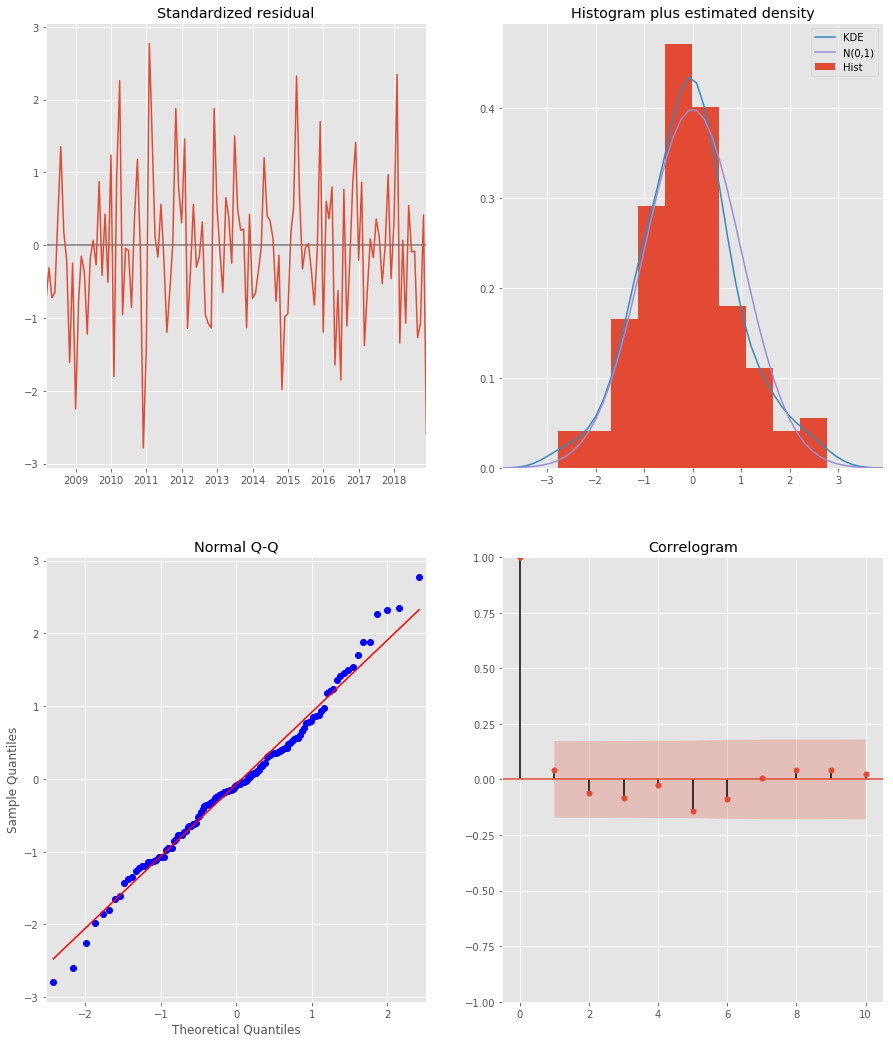

In [539]:
# Use plot_diagnostics with results calculated above.
res.plot_diagnostics(figsize=(15, 18))
plt.show()

In [456]:
crime_x['predict_dynamic']= res.predict(start=-12, dynamic=True)
crime_x['predict_ahead']= res.predict(start=-12, dynamic=False)

In [457]:
crime_x.tail(12)

,Count,Unem_R,Mean_Temp,Over70,Days,predict_dynamic,predict_ahead
Month,,,,,,,
2018-01-01,13022,5.0,36.406452,0.0,31,12951.290449,12951.290449
2018-02-01,11888,5.1,45.776429,1.0,28,11192.768192,11234.364361
2018-03-01,12713,4.6,44.391935,0.0,31,12350.514172,12776.546924
2018-04-01,12919,4.0,54.862667,2.0,30,12456.534717,12845.190447
2018-05-01,14108,3.7,73.545484,20.0,31,14388.198699,14820.264019
2018-06-01,14289,4.1,77.937667,25.0,30,14119.857819,14133.020834
2018-07-01,15205,4.2,83.967097,31.0,31,15066.026523,15170.928459
2018-08-01,15466,4.0,83.711935,31.0,31,15519.126133,15644.065924
2018-09-01,14024,3.6,75.378000,23.0,30,14449.021335,14469.235514


In [458]:
mod = sm.tsa.statespace.SARIMAX(crime_x['Count'], exog=crime_x[['Unem_R', 'Mean_Temp','Over70', 'Days']],  trend='n',order=(0, 1, 1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1059.356
Date:                            Thu, 30 May 2019   AIC                           2132.713
Time:                                    21:50:17   BIC                           2153.452
Sample:                                01-01-2006   HQIC                          2141.140
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Unem_R       205.5800    130.305      1.578      0.115     -49.813     460.973
Mean_Temp     78.4225      8.247   

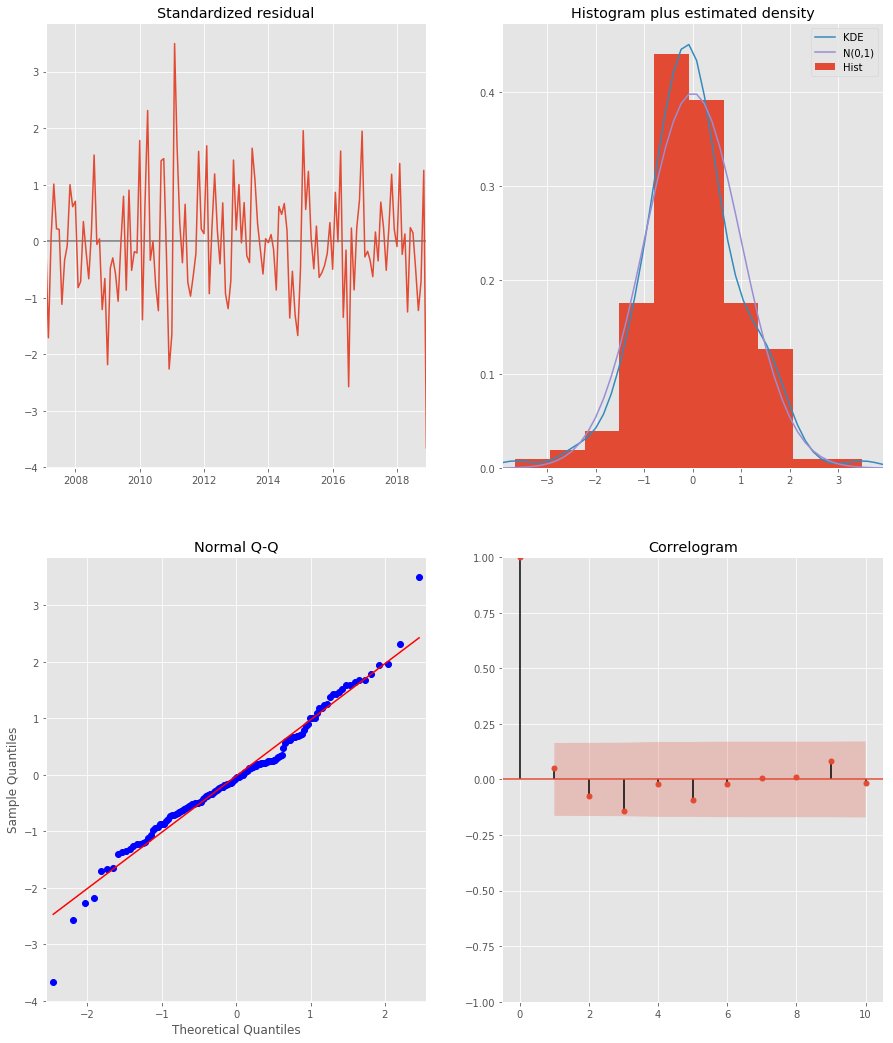

In [460]:
# Use plot_diagnostics with results calculated above.
res.plot_diagnostics(figsize=(15, 18))
plt.show()

In [470]:
mod = sm.tsa.statespace.SARIMAX(crime_x['Count'], exog=crime_x[['Unem_R', 'Mean_Temp','Days']],  trend='n',order=(0, 1, 1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1063.588
Date:                            Thu, 30 May 2019   AIC                           2139.176
Time:                                    21:53:22   BIC                           2156.953
Sample:                                01-01-2006   HQIC                          2146.400
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Unem_R        93.1506    122.806      0.759      0.448    -147.545     333.846
Mean_Temp     62.1884      7.542   

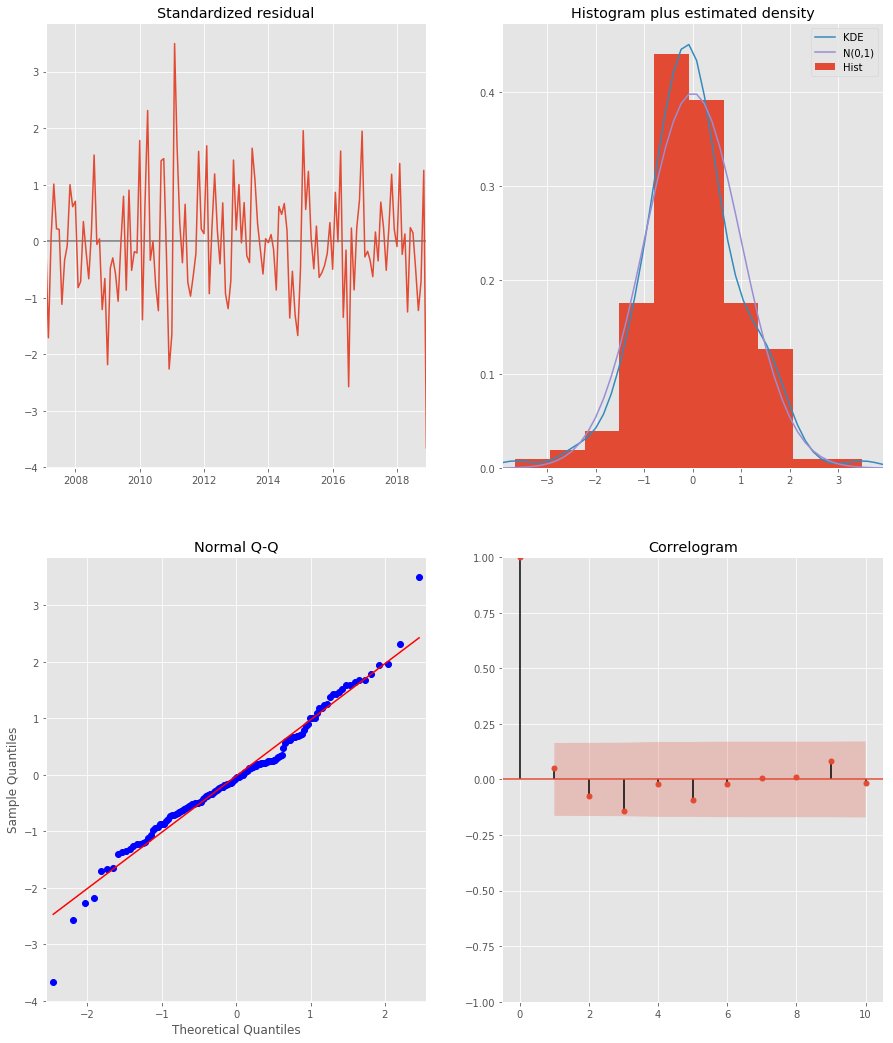

In [462]:
# Use plot_diagnostics with results calculated above.
res.plot_diagnostics(figsize=(15, 18))
plt.show()

In [463]:
mod = sm.tsa.statespace.SARIMAX(crime_x['Count'], exog=crime_x[['Unem_R']],  trend='n',order=(0, 1, 1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1101.379
Date:                            Thu, 30 May 2019   AIC                           2210.758
Time:                                    21:50:32   BIC                           2222.609
Sample:                                01-01-2006   HQIC                          2215.574
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Unem_R       283.0226    143.304      1.975      0.048       2.153     563.892
ma.L1         -0.2531      0.048   

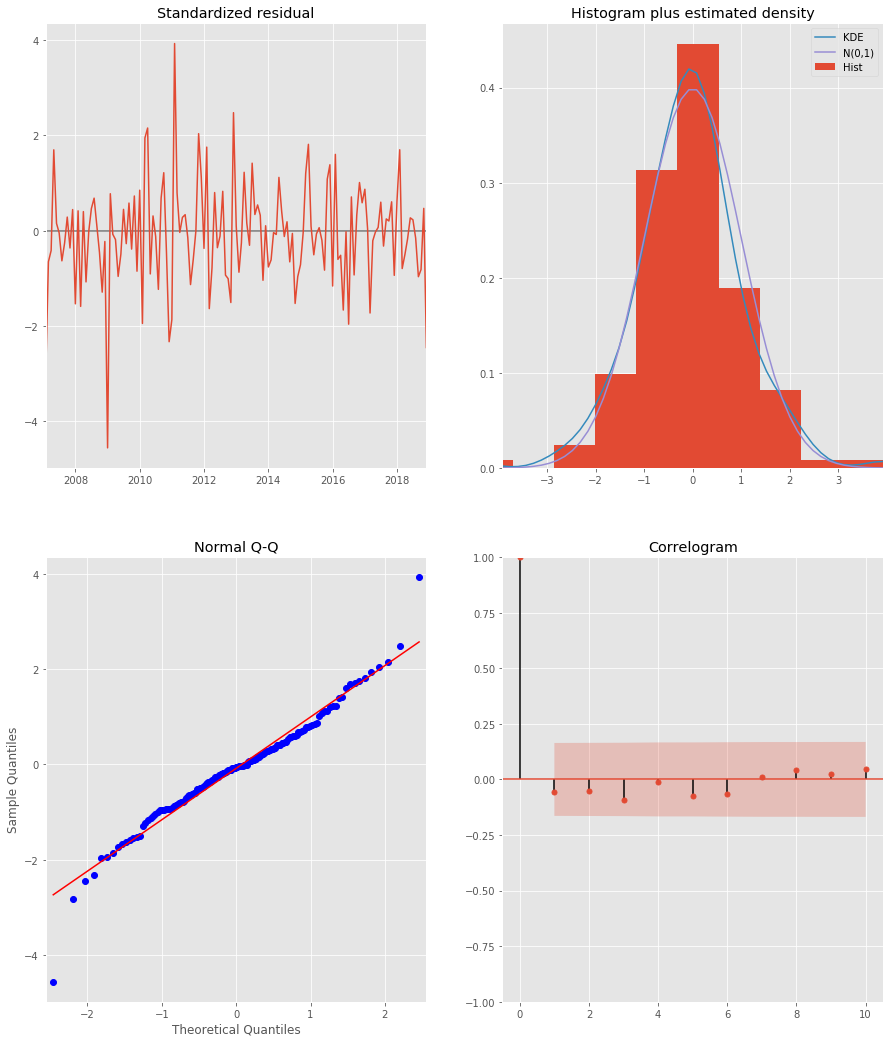

In [464]:
# Use plot_diagnostics with results calculated above.
res.plot_diagnostics(figsize=(15, 18))
plt.show()

In [465]:
mod = sm.tsa.statespace.SARIMAX(crime_x['Count'], exog=crime_x[['Days', 'Mean_Temp']],  trend='n',order=(0, 1, 1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1063.764
Date:                            Thu, 30 May 2019   AIC                           2137.527
Time:                                    21:50:39   BIC                           2152.341
Sample:                                01-01-2006   HQIC                          2143.547
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Days         552.6347     93.534      5.908      0.000     369.311     735.958
Mean_Temp     63.3875      7.710   

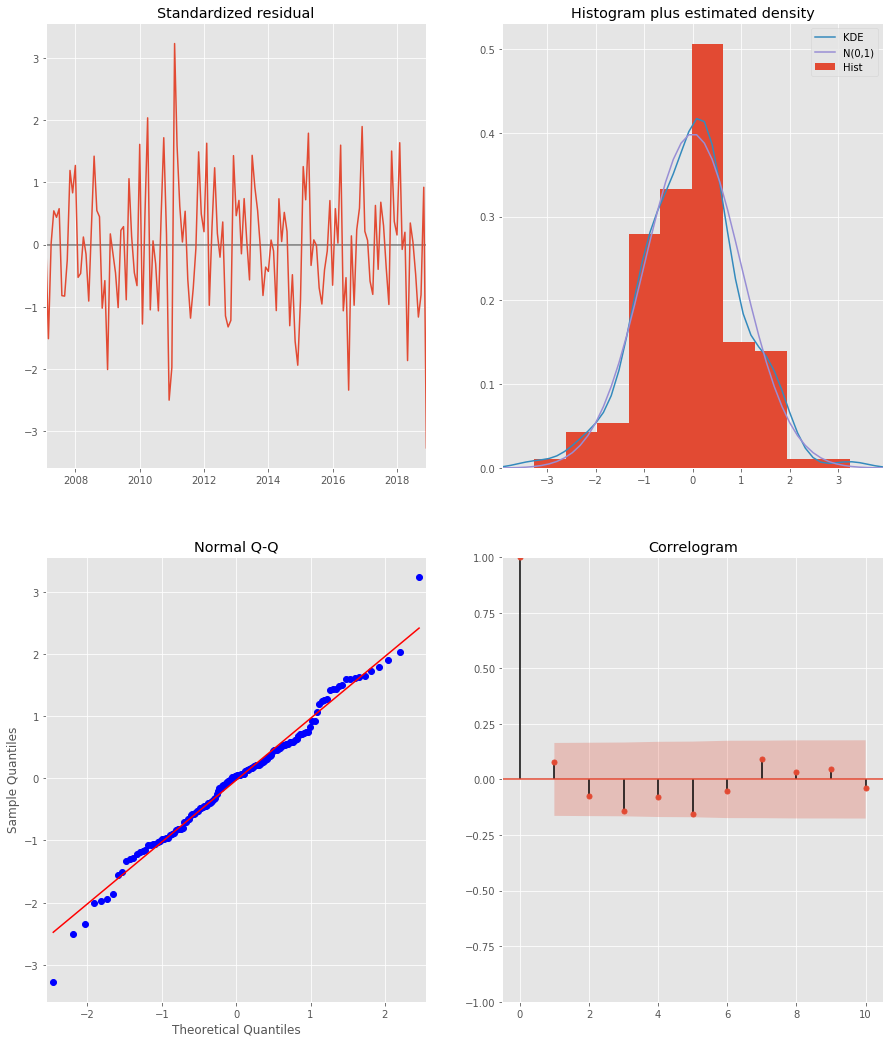

In [466]:
# Use plot_diagnostics with results calculated above.
res.plot_diagnostics(figsize=(15, 18))
plt.show()

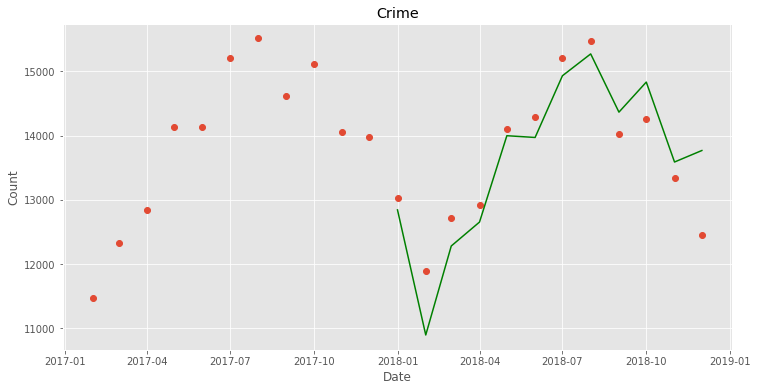

In [475]:
npredict = crime_M.Count['2018'].shape[0]
nobs = crime_M_diff.Count.shape[0]



 
# Graph
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='Crime', xlabel='Date', ylabel='Count')
ax.plot(crime_x.index[-npredict-npre+1:], crime_M.ix[-npredict-npre+1:, 'Count'], 'o', label='Observed')
ax.plot(crime_x.index[-npredict-npre+1:], crime_M.ix[-npredict-npre+1:, 'predict_dynamic'], 'g', label='Dynamic forecast')



### Mean Absolute Error per prediction

In [515]:
np.abs(crime_M_diff['2018']['Count'] - crime_M_diff['2018']['predict_dynamic']).sum()/len(crime_M_diff['2018'])

380.43434752225784

### Mean Squared Error per prediction


In [511]:
y_forecasted = crime_M_diff.predict_dynamic
y_truth = crime_M_diff.Count
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 240863.24


In [512]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 490.78


In [514]:
crime_M_diff

,Count,first_diff,first_diff_season,seasonal_diff,seasonal_diff_first,predict_dynamic,predict_ahead
Month,,,,,,,
2018-02-01,-1134.0,-178.0,657.0,827.0,657.0,-1947.088521,-1824.864619
2018-03-01,825.0,1959.0,-865.0,-38.0,-865.0,1385.334918,1951.102077
2018-04-01,206.0,-619.0,-260.0,-298.0,-260.0,372.485734,71.432357
2018-05-01,1189.0,983.0,183.0,-115.0,183.0,1344.101507,1299.211207
2018-06-01,181.0,-1008.0,300.0,185.0,300.0,-27.207677,-166.721123
2018-07-01,916.0,735.0,-340.0,-155.0,-340.0,960.722357,1073.788721
2018-08-01,261.0,-655.0,110.0,-45.0,110.0,339.827379,294.748799
2018-09-01,-1442.0,-1703.0,-502.0,-547.0,-502.0,-906.253202,-951.211516
2018-10-01,230.0,1672.0,285.0,-262.0,285.0,467.858241,94.077900


In [472]:
crime_x.tail()

,Count,Unem_R,Mean_Temp,Over70,Days,predict_dynamic,predict_ahead
Month,,,,,,,
2018-08-01,15466,4.0,83.711935,31.0,31,15519.126133,15644.065924
2018-09-01,14024,3.6,75.378000,23.0,30,14449.021335,14469.235514
2018-10-01,14254,3.6,62.257097,8.0,31,14806.264625,14564.624503
2018-11-01,13335,3.5,48.006333,0.0,30,13373.355629,12949.031182
2018-12-01,12455,3.9,43.165161,0.0,31,13994.739985,13797.422963


In [422]:
crime_M.tail(13)

,Count,first_diff,first_diff_season,seasonal_diff,seasonal_diff_first,predict_dynamic,predict_ahead
Month,,,,,,,
2017-12-01,13978,-81.0,-655.0,-576.0,-655.0,NaN,NaN
2018-01-01,13022,-956.0,170.0,-406.0,170.0,12842.277678,12842.277678
2018-02-01,11888,-1134.0,827.0,421.0,827.0,10895.189156,11017.413058
2018-03-01,12713,825.0,-38.0,383.0,-38.0,12280.524075,12968.515136
2018-04-01,12919,206.0,-298.0,85.0,-298.0,12653.009808,13039.947493
2018-05-01,14108,1189.0,-115.0,-30.0,-115.0,13997.111315,14339.158700
2018-06-01,14289,181.0,185.0,155.0,185.0,13969.903638,14172.437577
2018-07-01,15205,916.0,-155.0,0.0,-155.0,14930.625994,15246.226297
2018-08-01,15466,261.0,-45.0,-45.0,-45.0,15270.453374,15540.975096


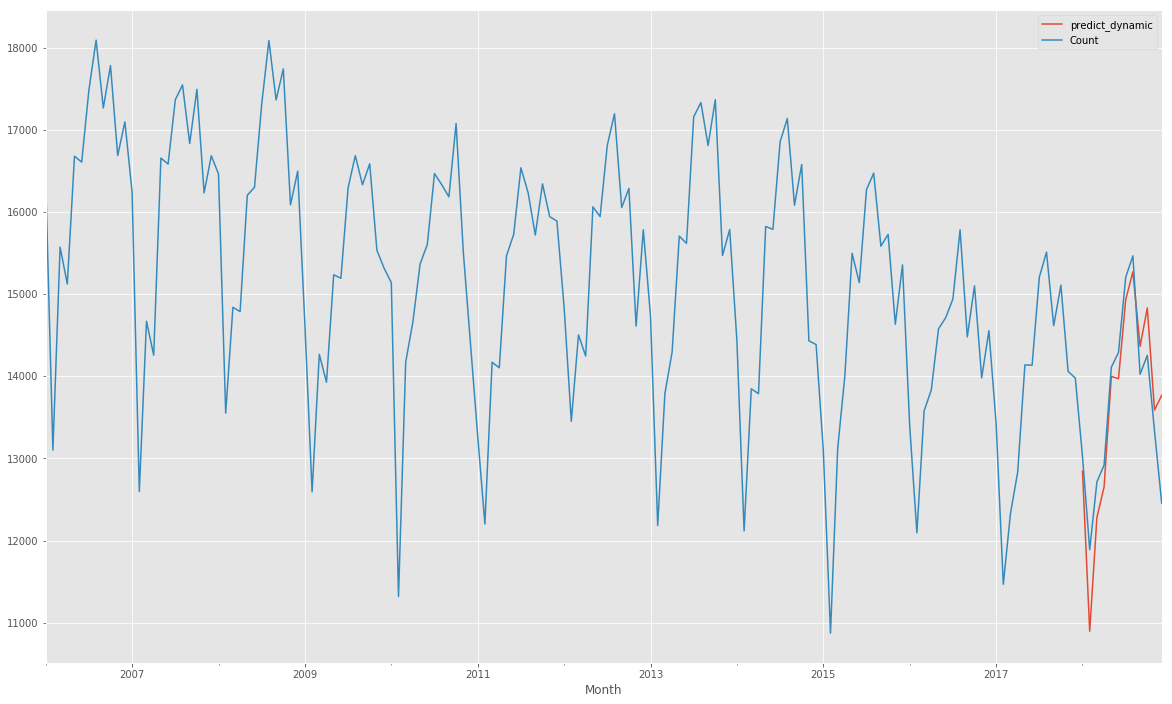

In [425]:
 
crime_M[['predict_dynamic', 'Count']].plot(figsize=(20, 12)) 

In [488]:
crime_M.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Month', length=156, freq=None)

In [548]:
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2019-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = crime_M(index = crime_M.index, columns = crime_M.columns)
crime_M = pd.concat([Month, future])

TypeError: 'DataFrame' object is not callable

In [482]:
res.predict()

2006-01-01    20342.723168
2006-02-01    14650.202841
2006-03-01    15384.388172
2006-04-01    15799.189805
2006-05-01    16171.528820
2006-06-01    16535.183411
2006-07-01    17675.322936
2006-08-01    17255.008563
2006-09-01    16862.088242
2006-10-01    17162.089136
2006-11-01    16811.943105
2006-12-01    16676.893385
2007-01-01    14738.624138
2007-02-01    12600.716708
2007-03-01    15388.453765
2007-04-01    14230.552811
2007-05-01    16382.688621
2007-06-01    16402.350024
2007-07-01    17118.466028
2007-08-01    17967.855299
2007-09-01    17245.272595
2007-10-01    17617.315004
2007-11-01    15641.347570
2007-12-01    16342.989011
2008-01-01    15857.915146
2008-02-01    13780.127391
2008-03-01    15059.402426
2008-04-01    14699.726914
2008-05-01    16300.256424
2008-06-01    16701.905961
                  ...     
2016-07-01    15890.369824
2016-08-01    15712.116941
2016-09-01    14883.585711
2016-10-01    14993.482161
2016-11-01    13716.166335
2016-12-01    13805.224894
2

In [547]:
crime_x.tail()

,Count,Unem_R,Mean_Temp,Over70,Days,predict_dynamic,predict_ahead,Count_Diff,Unem_R_Diff,Mean_Temp_Diff,Over70_Diff,Days_Diff,predict_dynamic_Diff,predict_ahead_Diff
Month,,,,,,,,,,,,,,
2018-08-01,15466,4.0,83.711935,31.0,31,15519.126133,15644.065924,-45.0,-3.000000e-01,2.450323,-1.0,0.0,NaN,NaN
2018-09-01,14024,3.6,75.378000,23.0,30,14449.021335,14469.235514,-547.0,4.440892e-16,-5.123763,-2.0,0.0,NaN,NaN
2018-10-01,14254,3.6,62.257097,8.0,31,14806.264625,14564.624503,-262.0,2.000000e-01,-6.127527,-10.0,0.0,NaN,NaN
2018-11-01,13335,3.5,48.006333,0.0,30,13373.355629,12949.031182,130.0,-1.000000e-01,3.280194,8.0,0.0,NaN,NaN
2018-12-01,12455,3.9,43.165161,0.0,31,13994.739985,13797.422963,-799.0,4.000000e-01,9.191097,2.0,0.0,NaN,NaN


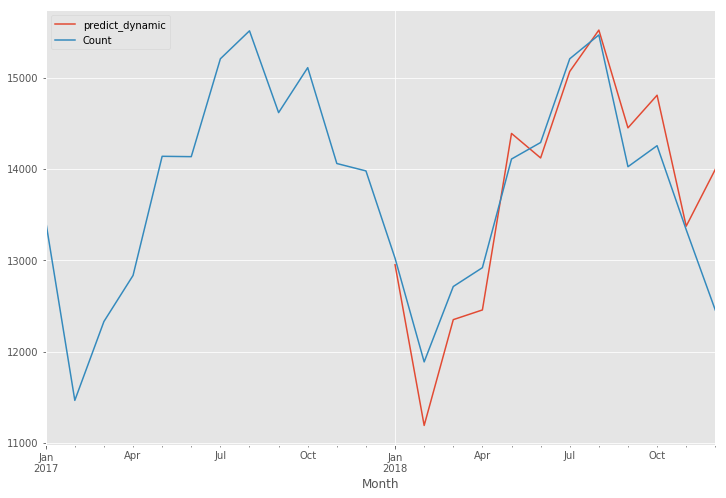

In [561]:
crime_x[['predict_dynamic', 'Count']].ix[-24:].plot(figsize=(12, 8)) 

In [565]:
# Get dynamic predictions with confidence intervals as above.
pred_dynamic = output.get_prediction(start=pd.to_datetime('2007-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

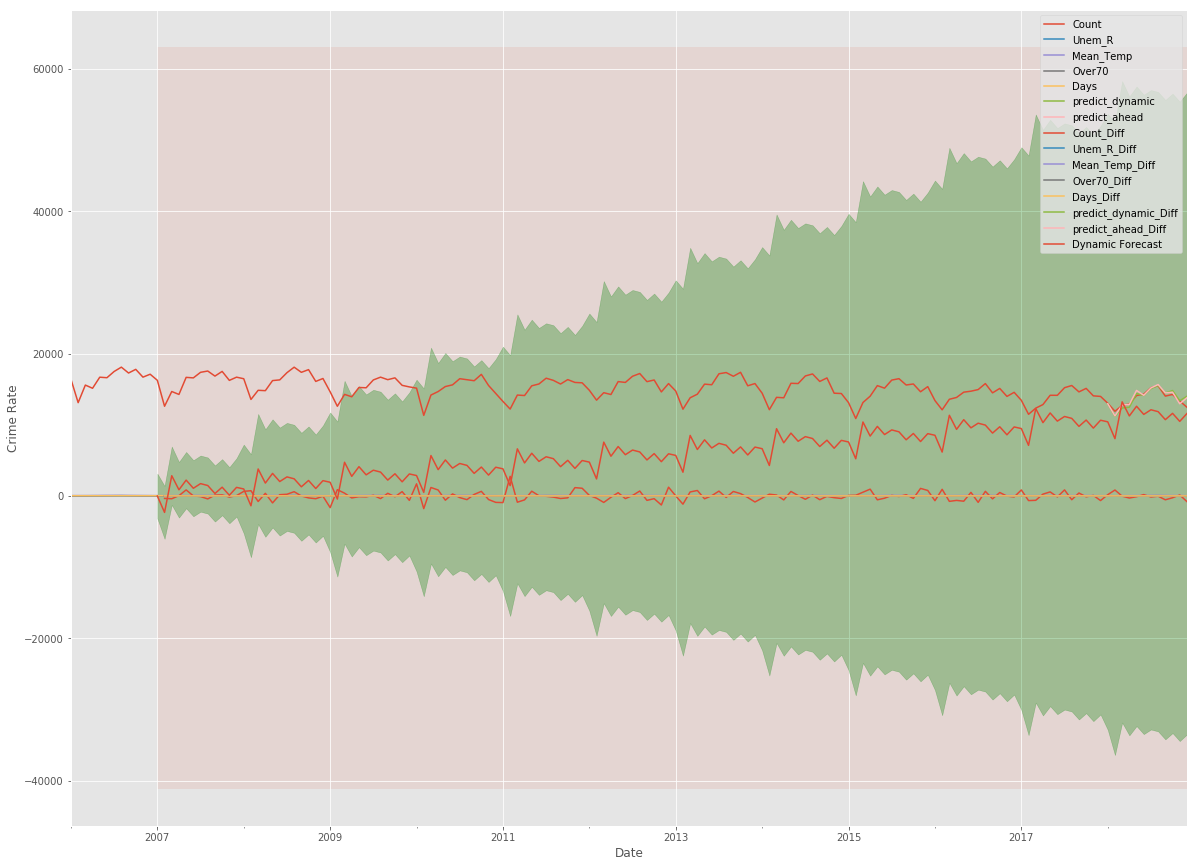

In [567]:
# Plot the dynamic forecast with confidence intervals.

ax = crime_x['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2007-01-01'), crime_x.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Crime Rate')

plt.legend()
plt.show()

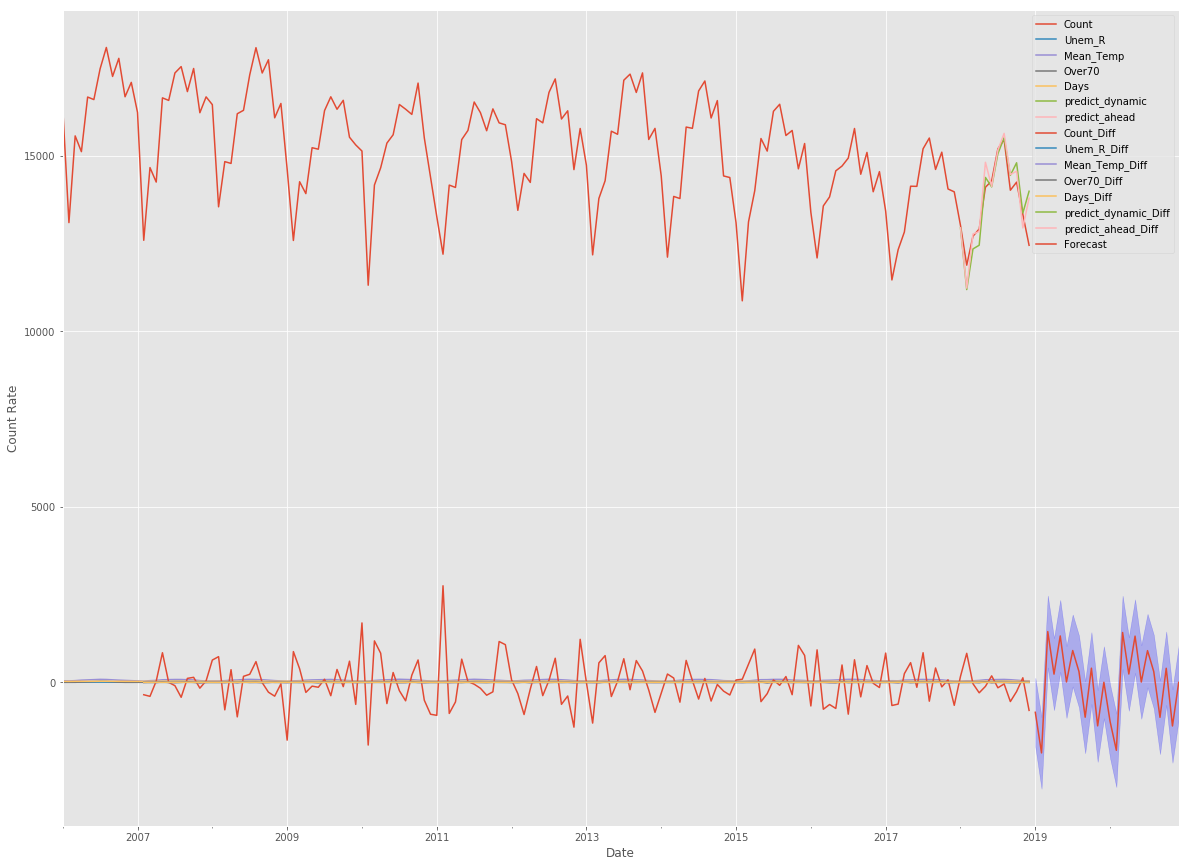

In [560]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()
#We can use the output of this code to plot the time series and forecasts of its future values.

# Plot future predictions with confidence intervals

ax = crime_x.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='b', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Count Rate')

plt.legend()
plt.show()